# Import data & install dependencies

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Final_Project_CS114
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.10.0+cu111 (CPU)


In [ ]:
!pip install craft_text_detector
!pip install --quiet vietocr==0.3.5

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=7411c016518565d0ff260241892bb314d6edb2cabeefeb6896c158be42eb9389
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
     |████████████████████████████████| 61 kB 6.1 MB/s 
     |████████████████████████████████| 948 kB 25.2 MB/s 
     |████████████████████████████████| 280 kB 73.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follo

# Số hóa tủ sách

In [ ]:
%cd /content/gdrive/MyDrive/Final_Project_CS114
# Cú pháp: !python main.py -i <thư mục chứa ảnh>
!python main.py -i /content/gdrive/MyDrive/Final_Project_CS114/Test

/content/gdrive/MyDrive/Final_Project_CS114
YOLOv5 🚀 v6.0-192-g436ffc4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 606 layers, 141044212 parameters, 0 gradients
Adding AutoShape... 
/usr/local/lib/python3.7/dist-packages/craft_text_detector/craft_utils.py:415: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys = np.array(polys)
/usr/local/lib/python3.7/dist-packages/craft_text_detector/predict.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys_as_ratio = np.array(polys_as_ratio)
/usr/local/lib/python3.7/d

# Hiện thị kết quả dự đoán

In [5]:
import pandas as pd

Predict = pd.read_csv('/content/gdrive/MyDrive/Final_Project_CS114/result.csv')
Predict.head(200)

,Unnamed: 0,file names,tên sách,tên tác giả,nhà xuất bản,tập,người dịch,tái bản
0,196,1.jpg,NHÀ VĂN VIỆT NAM,NaN,NHÀ XUẤT BẢN HỘI NHÀ VĂN,TẬP 3,NaN,NaN
1,199,10.jpg,GIẢI THÍCH NGỮ PHÁP TINH VỚI BÀI TẬP & ĐÁP ÁN ...,MATHANHƯƠNG,NXB ĐÃ NẪNG,NaN,NaN,NaN
2,58,100.jpg,DORAEMON VOL.23 NOBITA VÀ NHỮNG PHÁP SƯ GIÓ BÍ...,Fujiko-F-Fujio,NaN,NaN,NaN,NaN
3,57,101.jpg,KÍNH VẠN HOA,Nguyễn Nhật Ánh,KIM ĐỒNG,48,NaN,NaN
4,56,102.jpg,KÍNH VẠN HOA,Nguyễn Nhật Ánh,KIM ĐỒNG,31,NaN,NaN
...,...,...,...,...,...,...,...,...
195,17,63.jpg,trại hoa vàng,nguyễn nhật ánh,H UẤT,NaN,NaN,In lần thứ hai mươi bảy
196,16,64.jpg,SACH DÂN CHẤT HƠN 50.000 BẢN tới mua truyệ...,nguyễn nhật ánh,NHÀ XUẤT BẢN TRẺ,NaN,NaN,In lần thứ 9
197,27,65.jpg,cây chuối non đi giày xanh,nguyễn nhật ánh,NHA T BẢN TRẺ,NaN,NaN,NaN
198,26,66.jpg,0 hải xửa truyện da: 11,nguyễn nhật ánh,NHÀ XUẤT BẢN TRẺ,NaN,NaN,lần thứ 42


# Hiển thị kết quả thực tế

In [6]:
import pandas as pd

Actual = pd.read_csv('/content/gdrive/MyDrive/Final_Project_CS114/Actual.csv')
Actual.head(200)

,Unnamed: 0,file names,tên sách,tên tác giả,nhà xuất bản,tập,người dịch,tái bản
0,196,1.jpg,NHÀ VĂN VIỆT NAM,NaN,NHÀ XUẤT BẢN HỘI NHÀ VĂN,TẬP 3,NaN,NaN
1,199,10.jpg,GIẢI THÍCH NGỮ PHÁP TIẾNG ANH VỚI BÀI TẬP & ĐÁ...,MAI LAN HƯƠNG HÀ THANH UYÊN,NXB ĐÀ NẴNG,NaN,NaN,NaN
2,58,100.jpg,DORAEMON VOL.23 NOBITA VÀ NHỮNG PHÁP SƯ GIÓ BÍ...,Fujiko-F-Fujio,KIM ĐỒNG,NaN,NaN,NaN
3,57,101.jpg,KÍNH VẠN HOA,Nguyễn Nhật Ánh,KIM ĐỒNG,48,NaN,NaN
4,56,102.jpg,KÍNH VẠN HOA,Nguyễn Nhật Ánh,KIM ĐỒNG,31,NaN,NaN
...,...,...,...,...,...,...,...,...
195,17,63.jpg,trại hoa vàng,nguyễn nhật ánh,NHÀ XUẤT BẢN TRẺ,NaN,NaN,In lần thứ hai mươi bảy
196,16,64.jpg,bảy bước nhảy tới mùa hè,nguyễn nhật ánh,NHÀ XUẤT BẢN TRẺ,NaN,NaN,In lần thứ 9
197,27,65.jpg,cây chuối non đi giày xanh,nguyễn nhật ánh,NHÀ XUẤT BẢN TRẺ,NaN,NaN,NaN
198,26,66.jpg,Cô gái đến từ hôm qua,nguyễn nhật ánh,NHÀ XUẤT BẢN TRẺ,NaN,NaN,lần thứ 42


# Đánh giá

In [2]:
!pip install thefuzz

In [7]:
from thefuzz import fuzz
def evaluate(str1, str2):
  Ratio = fuzz.ratio(str1,str2)
  if Ratio > 99:
    return 1
  else:
    return 0

In [8]:
TP = 0
FP = 0
FN = 0
TN = 0
for feature in ['tên sách',	'tên tác giả',	'nhà xuất bản',	'tập',	'người dịch',	'tái bản']:
  for i in range(len(Predict)):
    checknull_pre = Predict[feature].isnull()
    checknull_actual = Actual[feature].isnull()
    if checknull_actual[i]:
      if checknull_pre[i]:
        TN += 1
      else:
        FN += 1
    else:
      if checknull_pre[i]:
        FP += 1
      else:
        if evaluate(Predict[feature][i], Actual[feature][i]):
          TP += 1
        else:
          FP += 1
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = (2 * precision * recall) / (precision + recall)
f1

0.5746887966804979

In [ ]:
percent_80 = [0.8874493927125505]
percent_85 = [0.8774509803921569]
percent_90 = [0.8482816429170159]
percent_95 = [0.7588075880758807]
percent_100 = [0.5746887966804979]                      

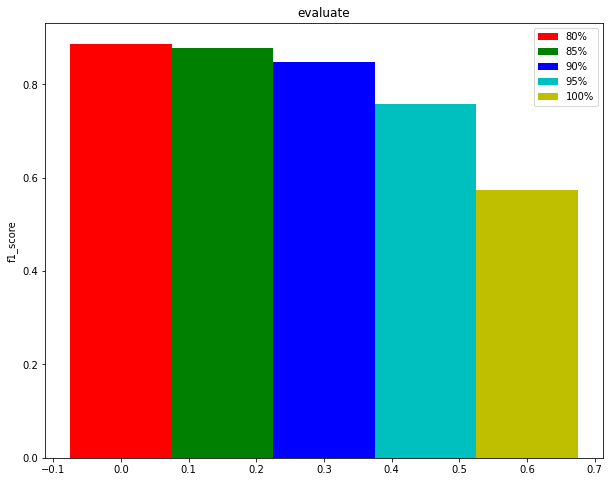

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1
ind = np.arange(N) 
width = 0.15
plt.figure(figsize=(10,8))
xvals = percent_80
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = percent_85
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = percent_90
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

avals = percent_95
bar4 = plt.bar(ind+width*3, avals, width, color = 'c')

bvals = percent_100
bar5 = plt.bar(ind+width*4, bvals, width, color = 'y')

plt.ylabel('f1_score')
plt.title("evaluate")
  
plt.legend((bar1, bar2, bar3, bar4, bar5), ('80%', '85%', '90%', '95%', "100%"))
plt.show()